# Harmonic Oscillator Solution
A script to demonstrate the bvp solver in Python using the harmonic oscillator
from quantum mechanics to demonstration of boundary conditions issues

Solve the Time Independent Schrodinger Equation
      $ -\frac{h^2}{2m} \frac{d^2 \psi}{dt^2}  + \frac{1}{2} mw^2 \psi = E \psi$ over the interval $0 < x < x_0$ where $ x_0 \rightarrow \infty $
 
Define on interval $[0, x_{end}]$ with three boundary conditions:

1. $ \psi(0) = 0 $ for anti-symetric solutions, $\psi(0) = 1$ for symetric functions
2. $\frac{d\psi(0)}{dx} = 0$ for symetric functions, $\frac{\psi(0)}{dx} = 1$ for anti-symetric functions
3. $ \psi(x_{end}) = 0$

In [4]:
from scipy.integrate import solve_bvp
import numpy as np

# Define some constants
# 1 ev = 0.16 aJ
n = 0; # Actual quantum number
h = 6.62e-16 #Planck's Constant in aJs 
m = 9.109e-31; # Electron mass in kgs 
d = 5; # The well width in nm
omega = 1e15;

# Some initial values and meshpoints
ninit = 100  # The initial number of mesh points
norm_new = 1
E_init = 0.125*n # The initial guess for Energy Eigen Value that works


# Derived quantities
x_start = 0 # The start of the interval
x_end = d/3   #The end of the interval
V0 = (1/2)*m*omega**2 
hbar = h/(2*np.pi) # The hbar value
E_actual = hbar*omega*(n+1/2) # Actual Energy Value
c = 2*m/(hbar**2) 
k_init = n*np.pi/d # Set the scale of wavelength of the initial guess


# Function that holds the derivatives of the diffential equation 
def fun(x, y,p):    # May need E on the end
    E = p[0]
    y1 = y[0]
    y2 = y[1]
    dy1_dx = y2
    dy2_dx = (-E+V0*(x**2))*y1*c
    return np.array([dy1_dx, dy2_dx])

# Function that contains the boundary values
if ~(np.round(n/2)==n/2):
    print('Odd Psi')
    
    def bc(ya, yb, p):
        y1a, y2a = ya
        y1b, y2b = yb
        return np.array([y1a, y1b, y2a-1 ])
else:
    print('Even Psi')
    
    def bc(ya, yb, p):
        y1a, y2a = ya
        y1b, y2b = yb
        return np.array([y1a-1, y1b, y2a ])

    
    # Define the mesh that you want to solve over
x = np.linspace(x_start,x_end,40)

# Define some intial guesses over
y_initial = np.zeros((2,x.size))
y_initial[0] = 0.25*np.ones(len(x)) 

# Now solve the equation wih an initial guess of 6 for E
sol = solve_bvp(fun, bc, x, y_initial, p=[E_init])

# Now solve over half the distance
x_short = np.linspace(x_start,x_end/2,40)
# Now solve the equation wih an initial guess of E_nit
sol_short = solve_bvp(fun, bc, x_short, y_initial, p=[E_init])


print('Exact Energy Eigen Value=',E_actual)
print('Energy Eigenvalue =',sol.p[0])
print('Energy Eigenvalue Short =',sol_short.p[0])

Even Psi
Exact Energy Eigen Value= 0.05268028616341736
Energy Eigenvalue = 0.05268184604959304
Energy Eigenvalue Short = 0.05333382304474098


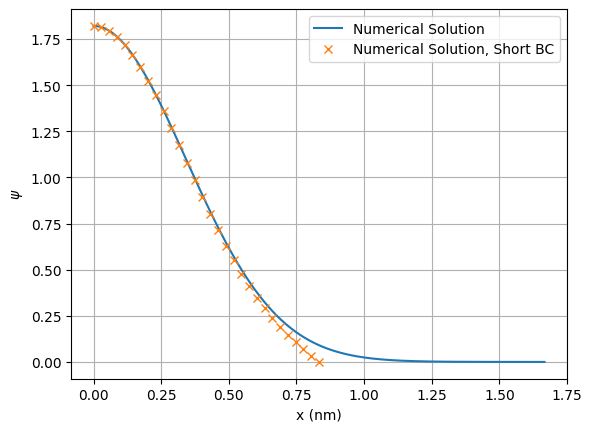

In [5]:
import matplotlib.pyplot as plt

x_plot = np.linspace(x_start, x_end, 300)
x_plot_short = np.linspace(x_start, x_end/2, 30)
y_plot = sol.sol(x_plot)[0]
y_plot_short = sol_short.sol(x_plot_short)[0]

# Calculate a normalization function
norm = np.sqrt(np.trapz((np.absolute(y_plot))**2,x_plot))
norm_short = np.sqrt(np.trapz((np.absolute(y_plot_short))**2,x_plot_short))

# Now plot
plt.figure(1)
plt.plot(x_plot, y_plot/norm,label = 'Numerical Solution')
plt.plot(x_plot_short, y_plot_short/norm,'x',label = 'Numerical Solution, Short BC')
#plt.plot(x_plot, psi_actual(x_plot),label = 'Exact Solution')
plt.xlabel("x (nm)")
plt.ylabel("$\psi$")
plt.grid()
plt.legend()
plt.show()
